In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('Book1.csv')
df

,Player Name,Runs,Wickets
0,V Kohli,429,1
1,Mohammad Rizwan,281,2
2,RG Sharma,271,3
3,Babar Hayat,235,1
4,Ibrahim Zadran,196,2
...,...,...,...
84,RA Jadeja,106,4
85,YS Chahal,127,4
86,Mohammad Hasnain,134,4
87,Mustafizur Rahman,134,4


In [84]:
df.shape

(89, 3)

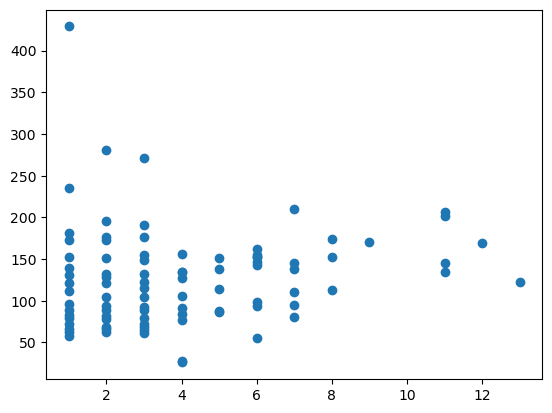

In [85]:
plt.scatter(df['Wickets'],df['Runs'])

In [86]:
SSC = []
K_range = range(1,6)
for i in K_range:
    model_km2 = KMeans(n_clusters=i)
    model_km2.fit(df[['Runs','Wickets']])
    SSC.append(model_km2.inertia_)

In [87]:
SSC

[304897.10112359555,
 142964.97089947088,
 64552.87126245847,
 38110.64621307354,
 24136.424786130665]

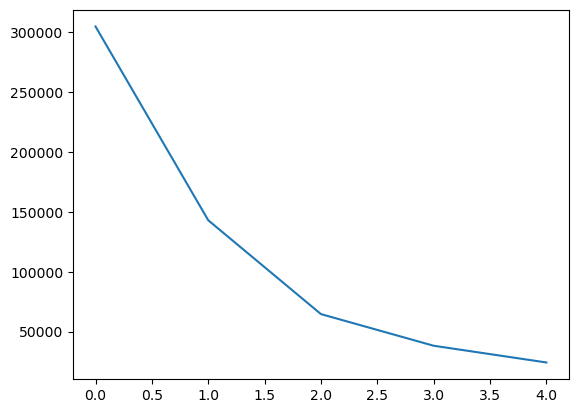

In [88]:
plt.plot(SSC)

In [89]:
scl_val = MinMaxScaler()
scl_val.fit(df[['Runs']])
df['Runs'] = scl_val.transform(df[['Runs']])
scl_val.fit(df[['Wickets']])
df['Wickets'] = scl_val.transform(df[['Wickets']])
df

,Player Name,Runs,Wickets
0,V Kohli,1.000000,0.000000
1,Mohammad Rizwan,0.632754,0.083333
2,RG Sharma,0.607940,0.166667
3,Babar Hayat,0.518610,0.000000
4,Ibrahim Zadran,0.421836,0.083333
...,...,...,...
84,RA Jadeja,0.198511,0.250000
85,YS Chahal,0.250620,0.250000
86,Mohammad Hasnain,0.267990,0.250000
87,Mustafizur Rahman,0.267990,0.250000


In [90]:
SSC = []
K_range = range(1,6)
for i in K_range:
    model_km2 = KMeans(n_clusters=i)
    model_km2.fit(df[['Runs','Wickets']])
    SSC.append(model_km2.inertia_)

In [91]:
SSC

[7.024302897051523,
 3.3557825676182076,
 2.429943217336049,
 1.5650161856008054,
 1.168061881779666]

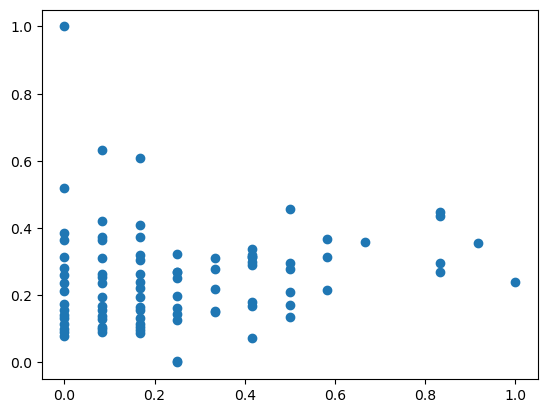

In [92]:
plt.scatter(df['Wickets'],df['Runs'])

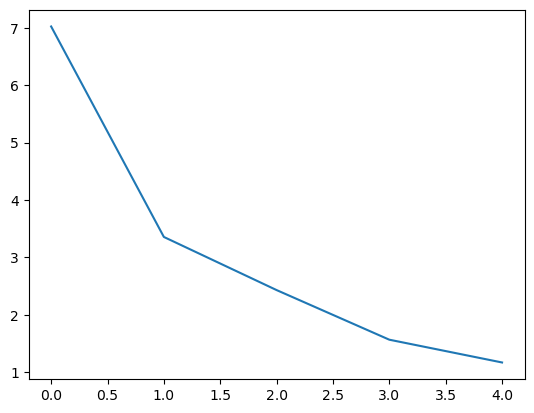

In [93]:
plt.plot(SSC)

In [94]:
model_km = KMeans(n_clusters = 3)
model_km

KMeans(n_clusters=3)

In [95]:
pred = model_km.fit_predict(df[['Runs','Wickets']])
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2])

In [96]:
df

,Player Name,Runs,Wickets
0,V Kohli,1.000000,0.000000
1,Mohammad Rizwan,0.632754,0.083333
2,RG Sharma,0.607940,0.166667
3,Babar Hayat,0.518610,0.000000
4,Ibrahim Zadran,0.421836,0.083333
...,...,...,...
84,RA Jadeja,0.198511,0.250000
85,YS Chahal,0.250620,0.250000
86,Mohammad Hasnain,0.267990,0.250000
87,Mustafizur Rahman,0.267990,0.250000


In [97]:
df['target'] = pred

In [98]:
df

,Player Name,Runs,Wickets,target
0,V Kohli,1.000000,0.000000,2
1,Mohammad Rizwan,0.632754,0.083333,2
2,RG Sharma,0.607940,0.166667,2
3,Babar Hayat,0.518610,0.000000,2
4,Ibrahim Zadran,0.421836,0.083333,2
...,...,...,...,...
84,RA Jadeja,0.198511,0.250000,0
85,YS Chahal,0.250620,0.250000,0
86,Mohammad Hasnain,0.267990,0.250000,0
87,Mustafizur Rahman,0.267990,0.250000,0


In [99]:
df_0 = df[df['target']==0]
df_0

,Player Name,Runs,Wickets,target
16,TM Dilshan,0.263027,0.083333,0
17,KL Rahul,0.263027,0.166667,0
18,MD Shanaka,0.260546,0.000000,0
19,Mohammad Shahzad,0.255583,0.083333,0
20,Rohan Mustafa,0.238213,0.166667,0
21,Sarfaraz Ahmed,0.235732,0.000000,0
22,Shoaib Malik,0.235732,0.083333,0
23,Zeeshan Maqsood,0.220844,0.166667,0
24,Shakib Al Hasan,0.213400,0.000000,0
25,Umar Akmal,0.196030,0.083333,0


In [100]:
df_1 = df[df['target']==1]
df_1

,Player Name,Runs,Wickets,target
49,B Kumar,0.240695,1.000000,1
50,Amjad Javed,0.354839,0.916667,1
51,Al-Amin Hossain,0.267990,0.833333,1
52,Mohammad Naveed,0.295285,0.833333,1
53,Rashid Khan,0.436725,0.833333,1
54,HH Pandya,0.449132,0.833333,1
55,PWH de Silva,0.357320,0.666667,1
56,Shadab Khan,0.215881,0.583333,1
57,Haris Rauf,0.315136,0.583333,1
58,Mohammad Nawaz,0.367246,0.583333,1


In [101]:
df_2 = df[df['target']==2]
df_2

,Player Name,Runs,Wickets,target
0,V Kohli,1.000000,0.000000,2
1,Mohammad Rizwan,0.632754,0.083333,2
2,RG Sharma,0.607940,0.166667,2
3,Babar Hayat,0.518610,0.000000,2
4,Ibrahim Zadran,0.421836,0.083333,2
5,PBB Rajapaksa,0.409429,0.166667,2
6,Sabbir Rahman,0.384615,0.000000,2
7,Muhammad Usman,0.372208,0.083333,2
8,Najibullah Zadran,0.372208,0.166667,2
9,P Nissanka,0.364764,0.000000,2


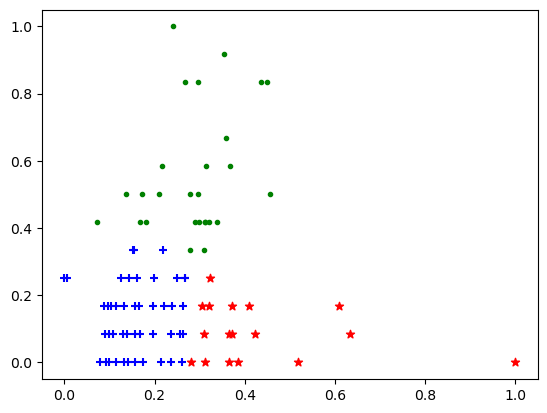

In [102]:
plt.scatter(df_0['Runs'],df_0['Wickets'],marker='+',color='b')
plt.scatter(df_1['Runs'],df_1['Wickets'],marker='.',color='g')
plt.scatter(df_2['Runs'],df_2['Wickets'],marker='*',color='r')

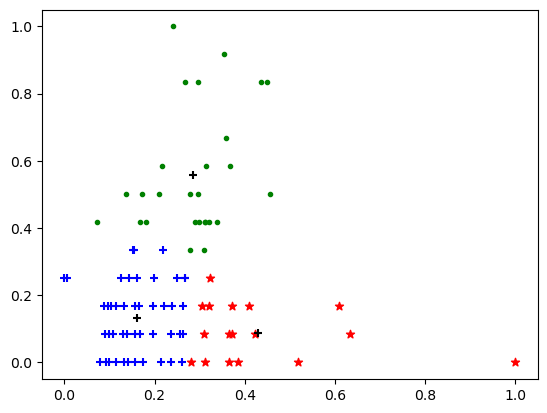

In [103]:
plt.scatter(df_0['Runs'],df_0['Wickets'],marker='+',color='b')
plt.scatter(df_1['Runs'],df_1['Wickets'],marker='.',color='g')
plt.scatter(df_2['Runs'],df_2['Wickets'],marker='*',color='r')
plt.scatter(model_km.cluster_centers_[:,0],model_km.cluster_centers_[:,1],color="black",marker = "+")

In [104]:
df

,Player Name,Runs,Wickets,target
0,V Kohli,1.000000,0.000000,2
1,Mohammad Rizwan,0.632754,0.083333,2
2,RG Sharma,0.607940,0.166667,2
3,Babar Hayat,0.518610,0.000000,2
4,Ibrahim Zadran,0.421836,0.083333,2
...,...,...,...,...
84,RA Jadeja,0.198511,0.250000,0
85,YS Chahal,0.250620,0.250000,0
86,Mohammad Hasnain,0.267990,0.250000,0
87,Mustafizur Rahman,0.267990,0.250000,0


In [105]:

def category(value):
    if value == 0:
        return "Batsman"
    if value == 1:
        return "All Rounder"
    elif value == 2:
        return "Bowler"
 
df['category'] = df['target'].map(category)
df

,Player Name,Runs,Wickets,target,category
0,V Kohli,1.000000,0.000000,2,Bowler
1,Mohammad Rizwan,0.632754,0.083333,2,Bowler
2,RG Sharma,0.607940,0.166667,2,Bowler
3,Babar Hayat,0.518610,0.000000,2,Bowler
4,Ibrahim Zadran,0.421836,0.083333,2,Bowler
...,...,...,...,...,...
84,RA Jadeja,0.198511,0.250000,0,Batsman
85,YS Chahal,0.250620,0.250000,0,Batsman
86,Mohammad Hasnain,0.267990,0.250000,0,Batsman
87,Mustafizur Rahman,0.267990,0.250000,0,Batsman


In [106]:
X = df.drop(columns = ['Player Name','target','category'])
Y = df['category']

In [107]:
X.shape

(89, 2)

In [108]:
Y.shape

(89,)

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [110]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 

In [111]:
train_accuracy

array([1.        , 0.96      , 0.97333333, 0.96      , 0.97333333,
       0.94666667, 0.98666667, 0.97333333])

In [112]:
test_accuracy

array([0.92857143, 0.92857143, 0.85714286, 0.92857143, 1.        ,
       0.92857143, 1.        , 0.92857143])

In [113]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [114]:
KNN.score(X_train,Y_train)

0.9733333333333334

In [117]:
pred = KNN.predict(X_test)
pred

array(['Batsman', 'All Rounder', 'Bowler', 'Bowler', 'All Rounder',
       'Batsman', 'All Rounder', 'Batsman', 'All Rounder', 'All Rounder',
       'Batsman', 'All Rounder', 'Batsman', 'Batsman'], dtype=object)

In [116]:
KNN.score(X_test,Y_test)

1.0